# Exploring Bank Churn Data

# Levels for Data Exploration

* Level 0 : Understanding Data
* Level 1 : Univariate Analysis 

### Importing the necessary libraries 

In [50]:
import numpy as np                     #for numerical computation
import pandas as pd                    #for data reading and data manipulation
import matplotlib.pyplot as plt        # to visualize the data
import seaborn as sns                  # to visualize the data
from tabulate import tabulate    
import warnings
warnings.filterwarnings("ignore")

### Reading the file 

In [51]:
df = pd.read_csv("S1_BankChurn_Data.csv")

# Level 0 Analysis: Understanding Data

## Reading the top 5 rows 

In [52]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


##  Number of rows and columns 

In [53]:
print(df.shape)

(10127, 19)


## Display the names of all the columns

In [54]:
print(df.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')


## Displaying the dataset information

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10034 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10067 non-null  float64
 14  Total_

## Separating Categorical and Numerical Variables

In [56]:
def separate_data_types(df):
    categorical = df.select_dtypes(include = ["object", "category"]).columns.tolist()
    continuous = df.select_dtypes(include=["number"]).columns.tolist()
    return categorical, continuous

categorical, continuous = separate_data_types(df)
table = [categorical, continuous]

print(tabulate({"Categorical": categorical, 
               "Continuous" : continuous}, headers=["Categorical", "Continuous"]))


Categorical      Continuous
---------------  ------------------------
Attrition_Flag   CLIENTNUM
Gender           Customer_Age
Education_Level  Dependent_count
Marital_Status   Months_on_book
Income_Category  Total_Relationship_Count
Card_Category    Months_Inactive_12_mon
                 Contacts_Count_12_mon
                 Credit_Limit
                 Total_Revolving_Bal
                 Avg_Open_To_Buy
                 Total_Trans_Amt
                 Total_Trans_Ct
                 Avg_Utilization_Ratio


## Level 1 Analysis (Univariate Analysis)

In [57]:
def info_to_cat(col):
    print(f"Unique values in {col} are : {df[col].unique()}")
    print(f"Mode of {col} is {df[col].mode()[0]}")
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}")

In [58]:
df.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                       93
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

## 1. Analysis of Attrition Flag: If the account is closed, then Attired Customer else Existing Customer


In [59]:
info_to_cat("Attrition_Flag")


Unique values in Attrition_Flag are : ['Existing Customer' 'Attrited Customer']
Mode of Attrition_Flag is Existing Customer
Number of missing values in Attrition_Flag is 0


In [60]:
category_count = df["Attrition_Flag"].value_counts()
category_count

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

###### Attrition Flag is a nominal datatype.

### Visual presentation of Attrition Flag attribute

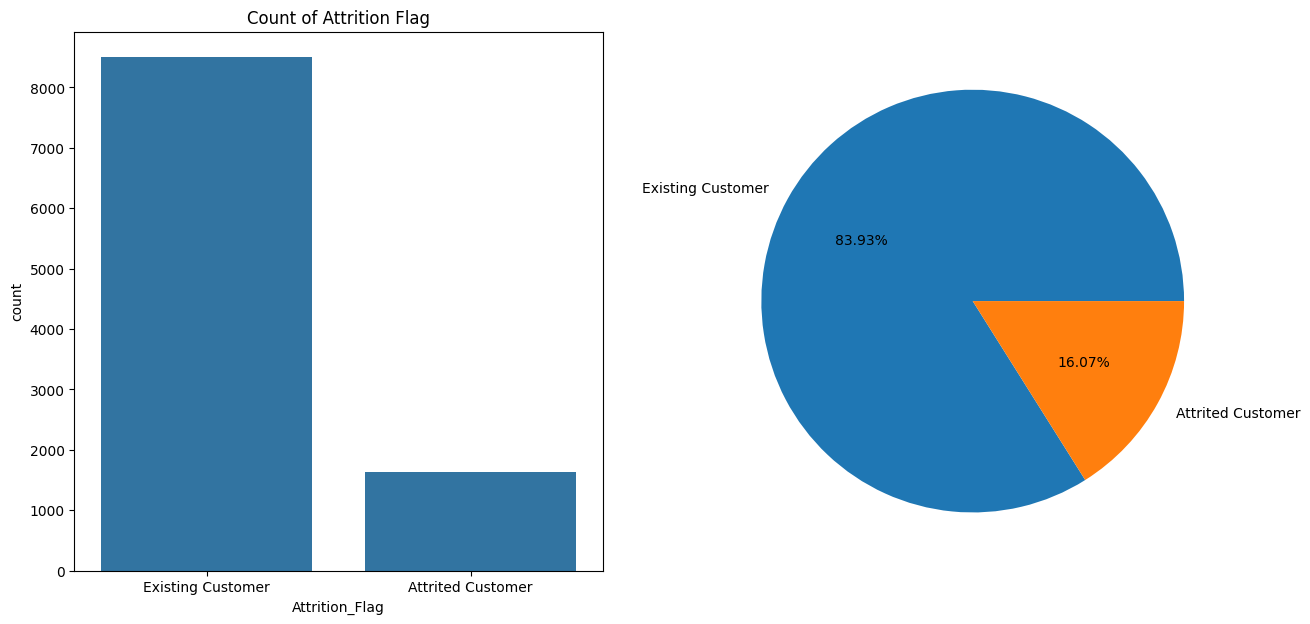

In [61]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].set_title("Count of Attrition Flag")
percentage = df["Attrition_Flag"].value_counts()
labels = list(df["Attrition_Flag"].value_counts().index)

sns.countplot(x = df["Attrition_Flag"], ax= ax[0])
plt.pie(percentage, labels= labels, autopct= "%0.2f%%")
plt.show()

#### **** Interpretations : The column indicates 16% of the customer left the bank or inactive, while 84% of the customer are still with the bank.

## 2. Analysis of  Gender column: Gender of a person (Male or Female)


In [62]:
info_to_cat("Gender")

Unique values in Gender are : ['M' 'F' nan]
Mode of Gender is F
Number of missing values in Gender is 93


In [63]:
gender_mode = df.Gender.mode()[0]
print(gender_mode)
df["Gender"].fillna(gender_mode, inplace= True)


F


In [64]:
df["Gender"].isnull().sum()

0

### Visual presentation of Gender attribute

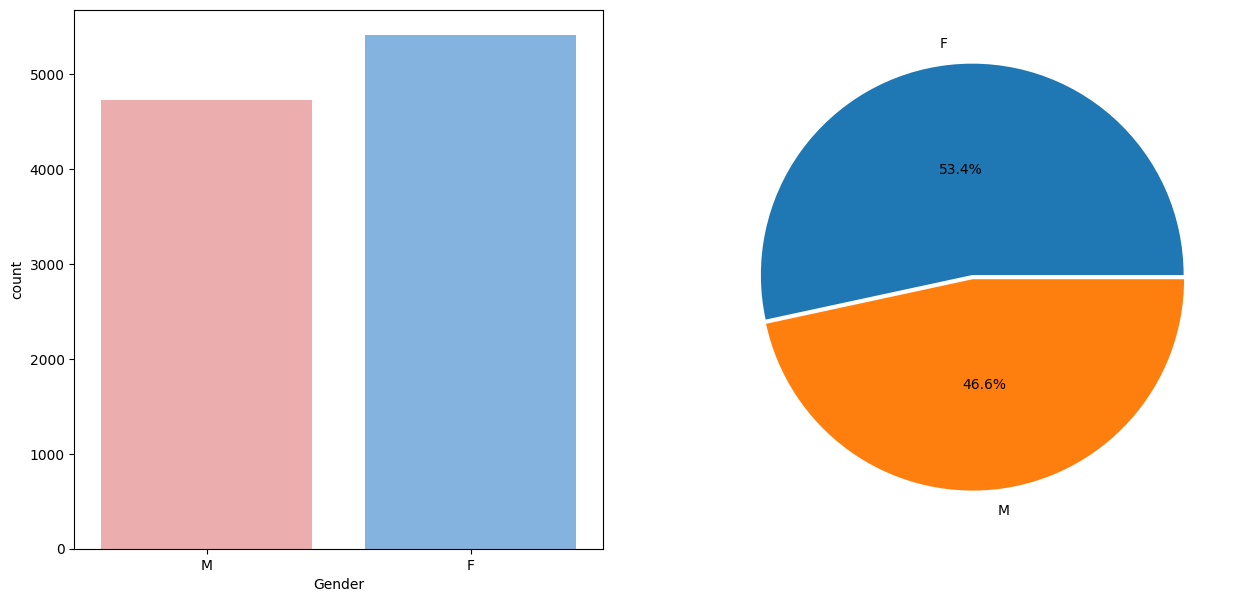

In [65]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 2, figsize = (15,7))
data = df["Gender"].value_counts()
labels = data.keys()
palette = ["red", "green"]
sns.countplot(x = df["Gender"], ax = ax[0], palette = {"M": "#FF9999", "F": "#66B3FF"} , saturation= 0.6)
plt.pie(x = data, autopct = "%.1f%%", explode = [0.02, 0.0], labels = labels, pctdistance = 0.5)
plt.show()

## 3. Analysis of  Dependent Count: Number of dependents on each customer 


In [66]:
info_to_cat("Dependent_count")


Unique values in Dependent_count are : [  3   5   4   2   0   1   9  29 103  22  25  78  90  35  60  42 119 104
  88  48  34 143 100  59 130  95   7  82  69  92 110  17  10  27  19 109
 142 116 113 125  80  63  24  97 102  52  87  11 117  13  67  89  61  72
 120  76]
Mode of Dependent_count is 3
Number of missing values in Dependent_count is 0


#### **** Interpretation : Some customers are having many dependents, This could be a result of human error in data.

### Visual presentation of Dependent_count attribute

0.09%
0.18%
0.26%
0.27%
0.15%
0.04%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%


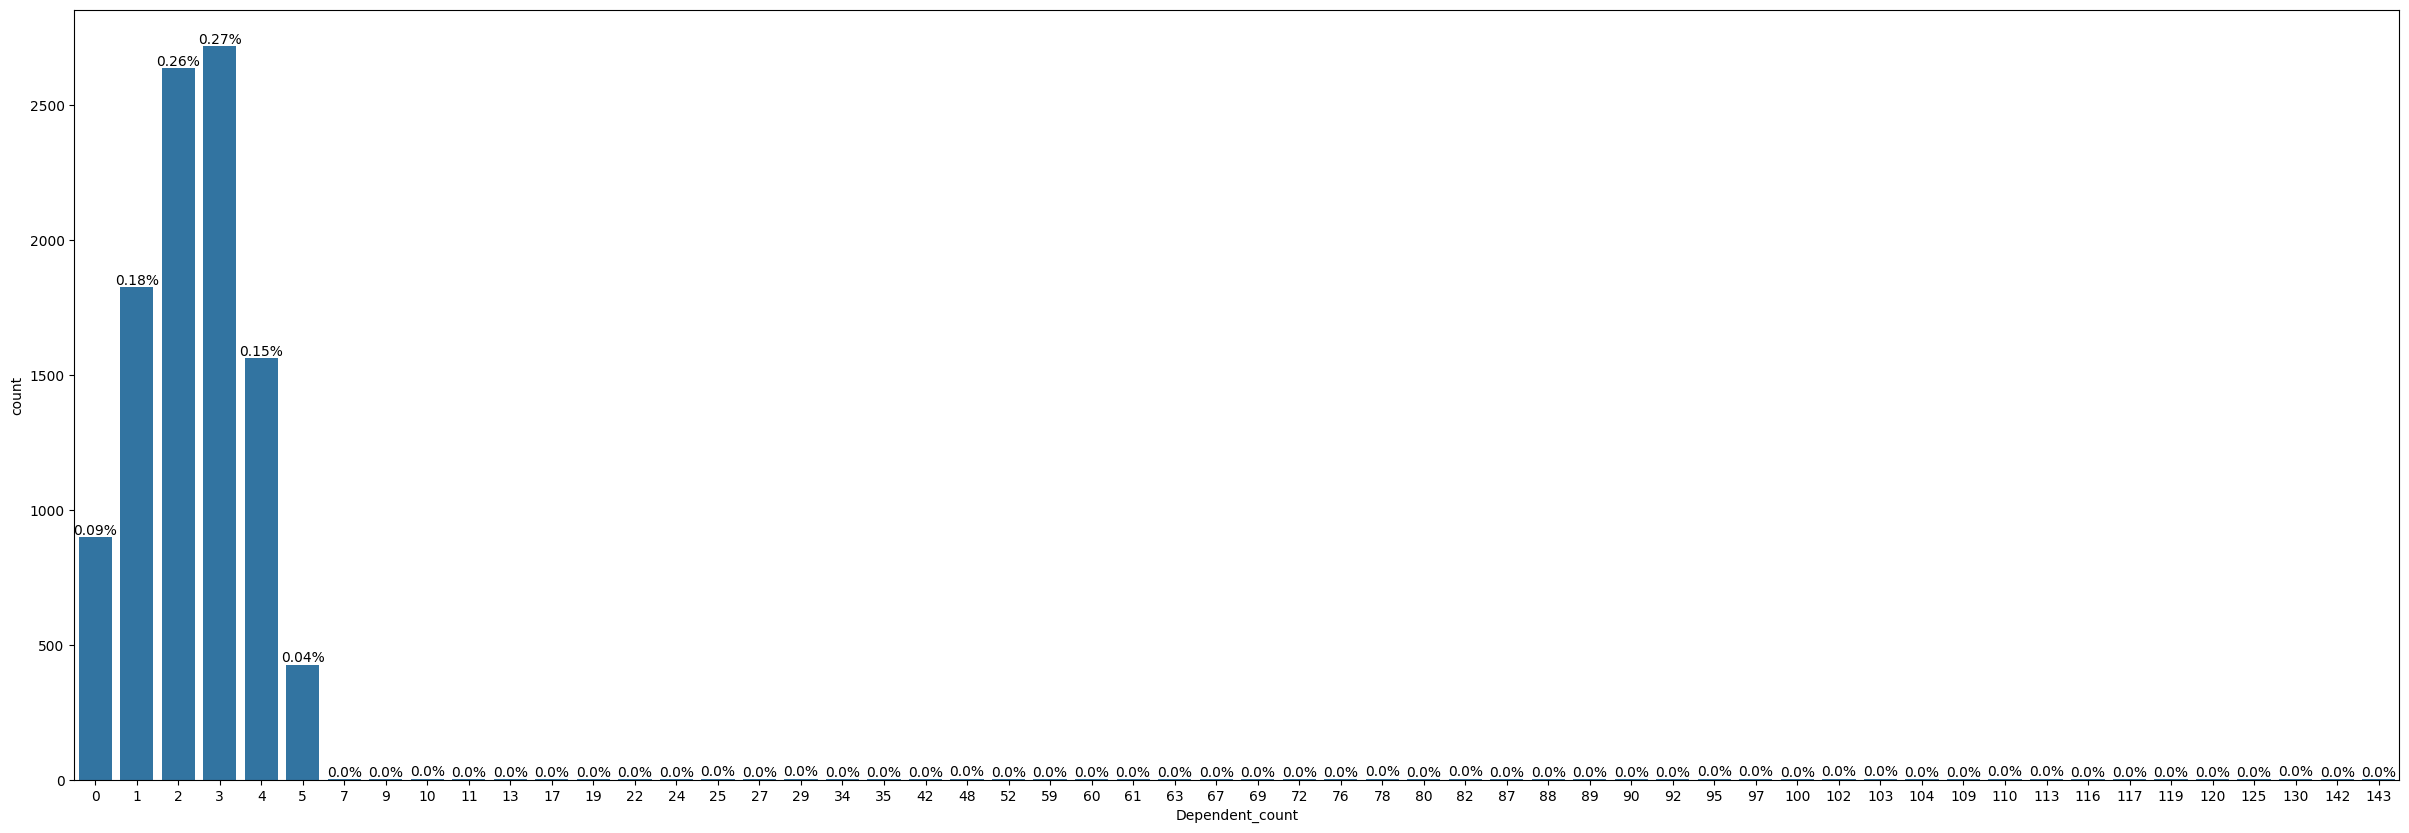

In [67]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Dependent_count"])
for i in ax.patches:
    percentage = f"{round(i.get_height() /len(df), 2)}%" 
    print(percentage)
    x = i.get_x() + i.get_width() /2                            # get_x: returns the left corrdinate of the rectangle, get_width: returns width
                                                                #of rectagle
    y = i.get_height()
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
    fig.set_figheight(10)                                                             # annotate: used to annotate over objects, here objects are 
                                                                                        #the bars
    fig.set_figwidth(30)
plt.show()

## Outliers Analysis and Treatment:
The customers who have a dependent count greater than the 5 are replaced with the mean of the population.

In [68]:
mean = int(df.Dependent_count.mean())
#accessing the dependent count higher than 5
x = df[df["Dependent_count"] > 5].index
for index in x:
    df.loc[index, "Dependent_count"] = mean

In [69]:
info_to_cat("Dependent_count")

Unique values in Dependent_count are : [3 5 4 2 0 1]
Mode of Dependent_count is 3
Number of missing values in Dependent_count is 0


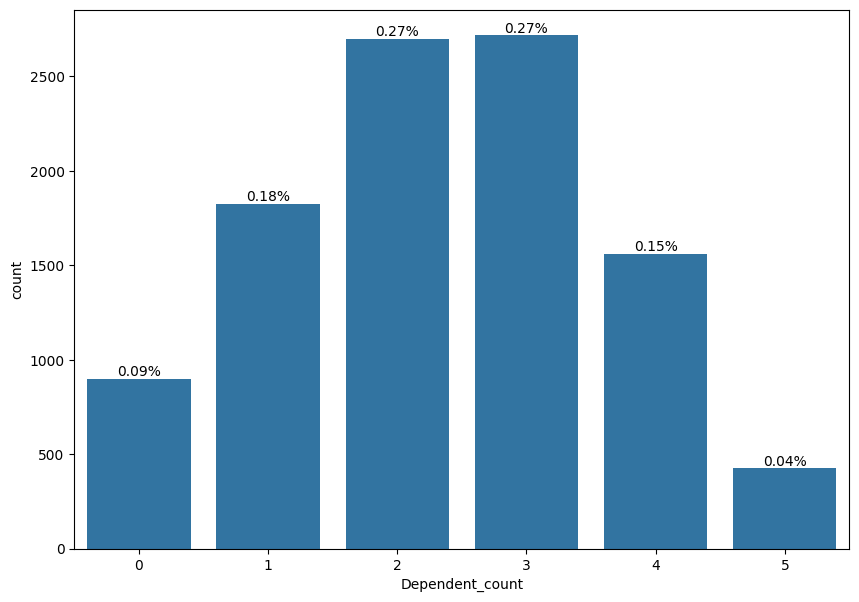

In [70]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Dependent_count"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

#### **** Interpretation Customers usually have 2 to 3 number of dependents, which adds upto 54% of the total population

## 4. Analysis of  Education Level: Education level of a card holder 


In [71]:
info_to_cat( "Education_Level")

Unique values in Education_Level are : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Mode of Education_Level is Graduate
Number of missing values in Education_Level is 0


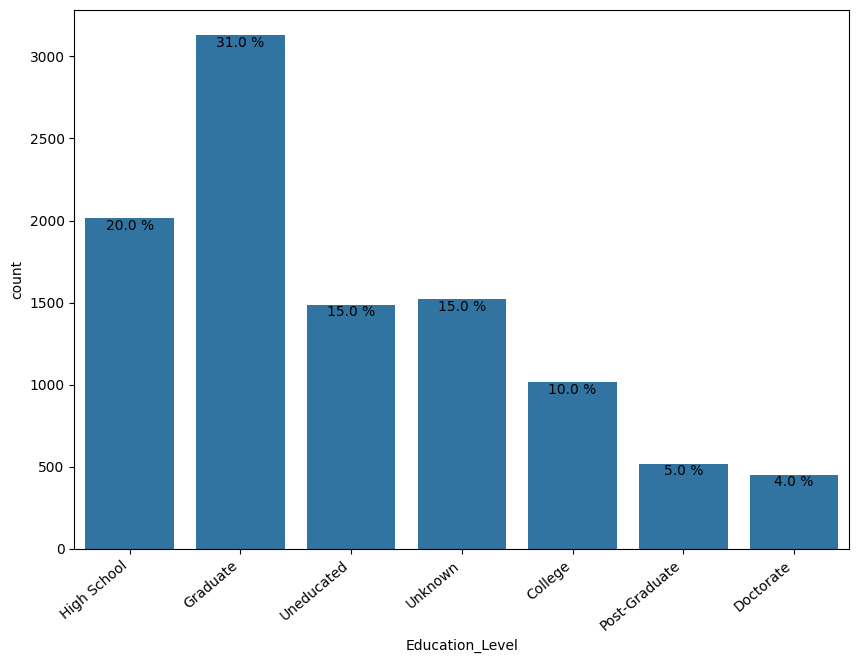

In [72]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Education_Level"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right") # set_xticklabels is used to set the labels of the x axis
                                                                       # ax.get_xtickslabels() returns all the labels that we need to print
                                                                       # rotation: rotate the xlabels at angle provided, and
                                                                       # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right
count = len(df["Education_Level"])                                     # counting the number of rows in whole dataset
for bar in ax.patches:                                                 # ax.patches returns the rectange object from matplotlib 
    percentage = f"{round(bar.get_height()/count, 2)*100} %"           # first it calculate the bar heightand then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                # get_height: returns height of rectangle bar.
    ax.annotate(percentage, (x, y), ha = "center", va = "top")          # va: Vertical axis: -> top means percentage would bneath the bar head
                                                                        # annotate: used to annotate over objects. here objects are the bars 
plt.show()

#### ***Interpretation: Most people are graduates or have completed high school, which adds up to 51% of the total population.

## 5. Analysis of  Marital Status: Marital status of a card holder


In [73]:
info_to_cat("Marital_Status")

Unique values in Marital_Status are : ['Married' 'Single' 'Unknown' 'Divorced']
Mode of Marital_Status is Married
Number of missing values in Marital_Status is 0


Marital_Status
Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: count, dtype: float64


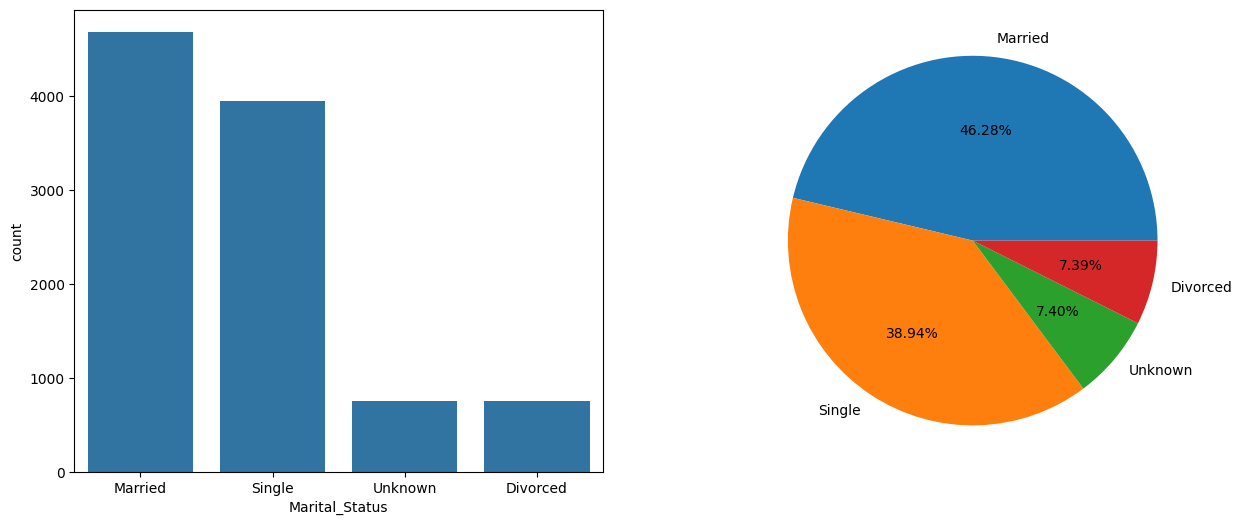

In [74]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
percentage = (df["Marital_Status"].value_counts()/len(df))*100      # value count is a function to calulate the number of the column marital status 
                                                                        #keeping its classes as index. 
print(percentage)
sns.countplot(x = df["Marital_Status"], ax = ax[0])
labels = list(df["Marital_Status"].value_counts().index)            # value_counts returns the count of the classes present in the marital status and its index which is the class name 
                                                                         # is accessed by the index; in sequence format and then converted into the list. 
ax[1].pie(percentage,labels = labels, autopct= "%0.2f%%")           # autpct: is the way how the number would print on the graph.
plt.show()

#### ***Interpretation: 46% of the people are Married and 39% are Single.

## 6. Analysis of  Income Category: Income category of a card holder




In [75]:
info_to_cat("Income_Category")

Unique values in Income_Category are : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Mode of Income_Category is Less than $40K
Number of missing values in Income_Category is 0


Income_Category
Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: count, dtype: float64


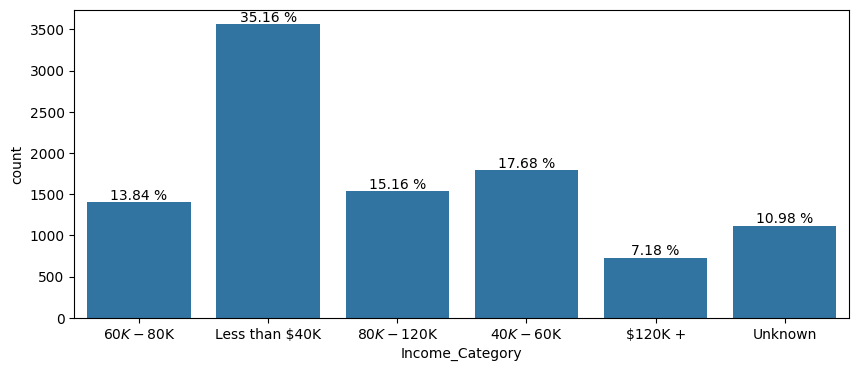

In [76]:
print((df["Income_Category"].value_counts()/len(df))*100)               #First calculated the number of income category via value counts inbuilt function and then 
                                                                            #calculated the percentage of it.
fig, ax = plt.subplots(figsize = (10, 4))
sns.countplot(x = df[ 'Income_Category'], ax = ax)
for bar in ax.patches:                                                  # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  # first it calculate the bar height and then dividing by the number of rows in data and 
                                                                            #multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )       # annotate: used to annotate over objects. here objects are the bars.
plt.show()

#### ***Interpretation: Majority of the population is earning less than $40k.

## 7. Analysis of  Card Category: Type of card


In [77]:
info_to_cat("Card_Category")

Unique values in Card_Category are : ['Blue' 'Gold' 'Silver' nan 'Platinum']
Mode of Card_Category is Blue
Number of missing values in Card_Category is 132


In [78]:
card_mode = df.Card_Category.mode()[0]
print(card_mode)
df["Card_Category"].fillna(card_mode, inplace = True)

Blue


Card_Category
Blue        9447
Silver       544
Gold         116
Platinum      20
Name: count, dtype: int64


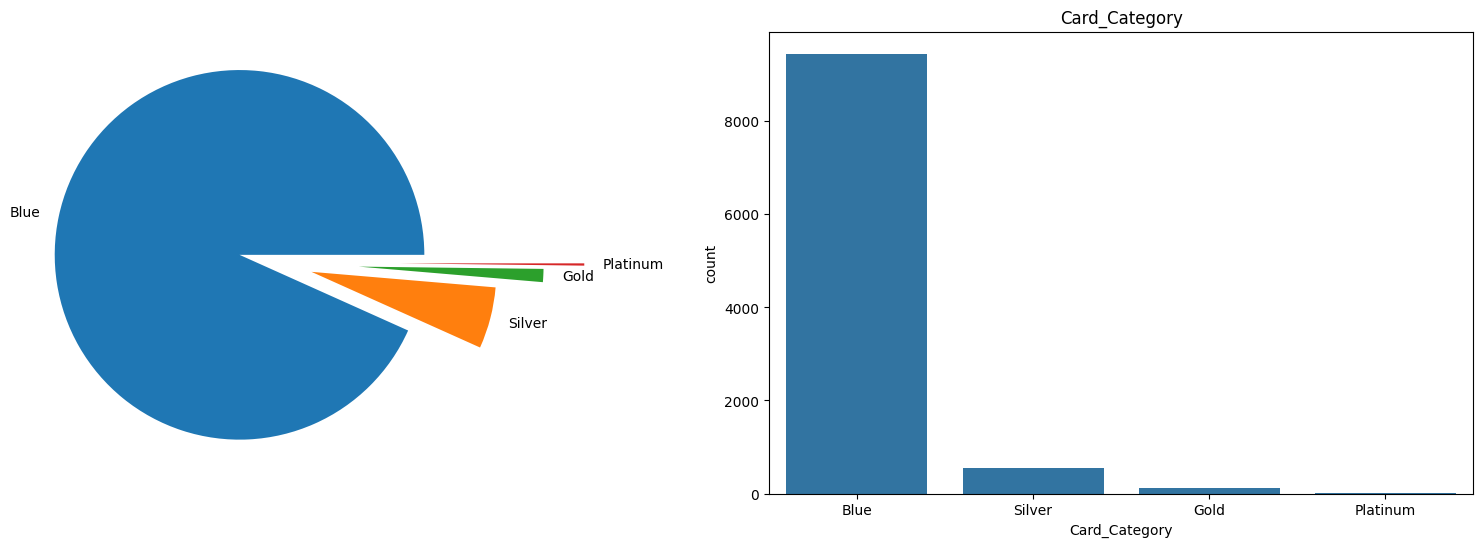

In [79]:
data = df["Card_Category"].value_counts()                                   #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                         # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2, 0.45, 0.67], labels = labels)         # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["Card_Category"], ax = ax[1], order = df["Card_Category"].value_counts().index)                                                                                               
plt.title("Card_Category")                                                  # title is used to prints the title on the image. 
plt.show()

## 8. User defined function which returns percentage using bar graphs

In [80]:
def bar_percentage(ax, count: "number of rows in data"):
    for bar in ax.patches:
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  # first it calculate the bar height and then dividing by the number of row(to calculate percentage)
                                                                          # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.
        x = bar.get_x() + bar.get_width() /2                          # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
        #print(bar.get_width())
        y = bar.get_height()                                          # get_height: returns height of rectangle bar.
        #print(y)
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") # va: Vertical axis: -> top means percentage would bneath the bar head. top, bottom or center 
                                                                      # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right.
                                                                      # annotate: used to annotate over objects. here objects are the bars 
    plt.show()

## 9. Analysis of Total Relationship Count: Years of relationship with bank


In [81]:
info_to_cat("Total_Relationship_Count")

Unique values in Total_Relationship_Count are : [5 6 4 3 2 1]
Mode of Total_Relationship_Count is 3
Number of missing values in Total_Relationship_Count is 0


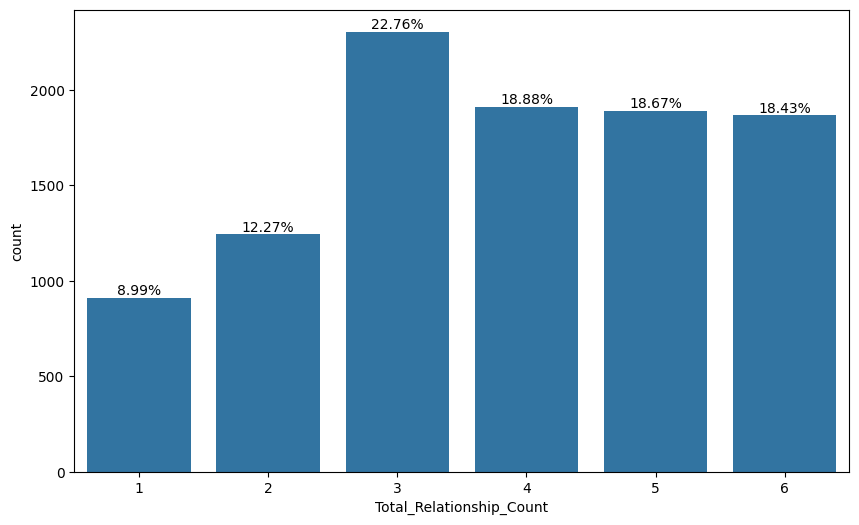

In [82]:
fig, ax = plt.subplots(figsize  = (10 , 6))
ax = sns.countplot(x = df["Total_Relationship_Count"])
bar_percentage(ax, len(df))   

## 10. Analysis of  Months of Inactivity: Months elapsed since the last activity using a credit card. 


In [83]:
info_to_cat("Months_Inactive_12_mon")

Unique values in Months_Inactive_12_mon are : [1 4 2 3 6 0 5]
Mode of Months_Inactive_12_mon is 3
Number of missing values in Months_Inactive_12_mon is 0


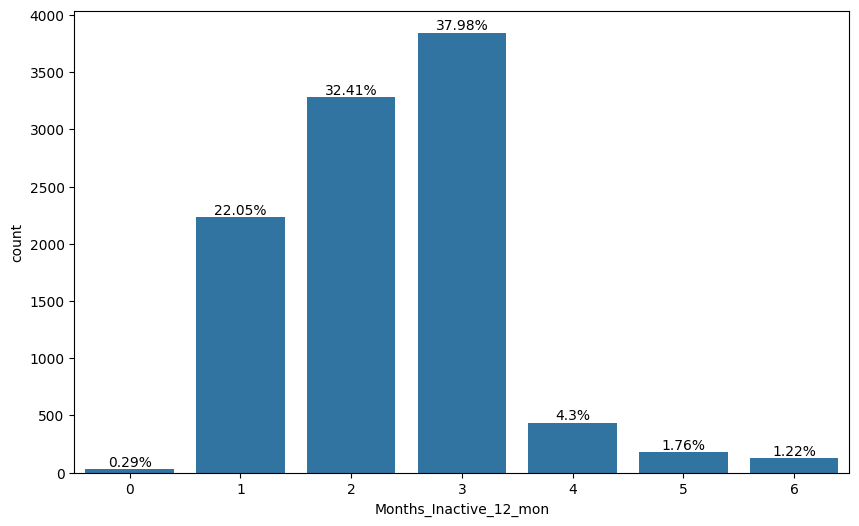

In [84]:
fig, ax = plt.subplots(figsize  = (10 , 6))
ax = sns.countplot(x = df['Months_Inactive_12_mon'])
bar_percentage(ax, len(df))                         # calling the function to plot the percentage on the bars
plt.show()

## User defined function for calculating mean, median, mode,  standard deviation, and count of all null values 

In [85]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

## 11. Analysis of  the Customer Age: Age of the customer


In [86]:
info_of_numerical("Customer_Age")

The mean of the Customer_Age is 47.285276982324476
The median of the Customer_Age is 46.0
The mode of the Customer_Age is 44
The standard deviation of the Customer_Age is 13.270923260536534
Number of missing values in the Customer_Age is 0


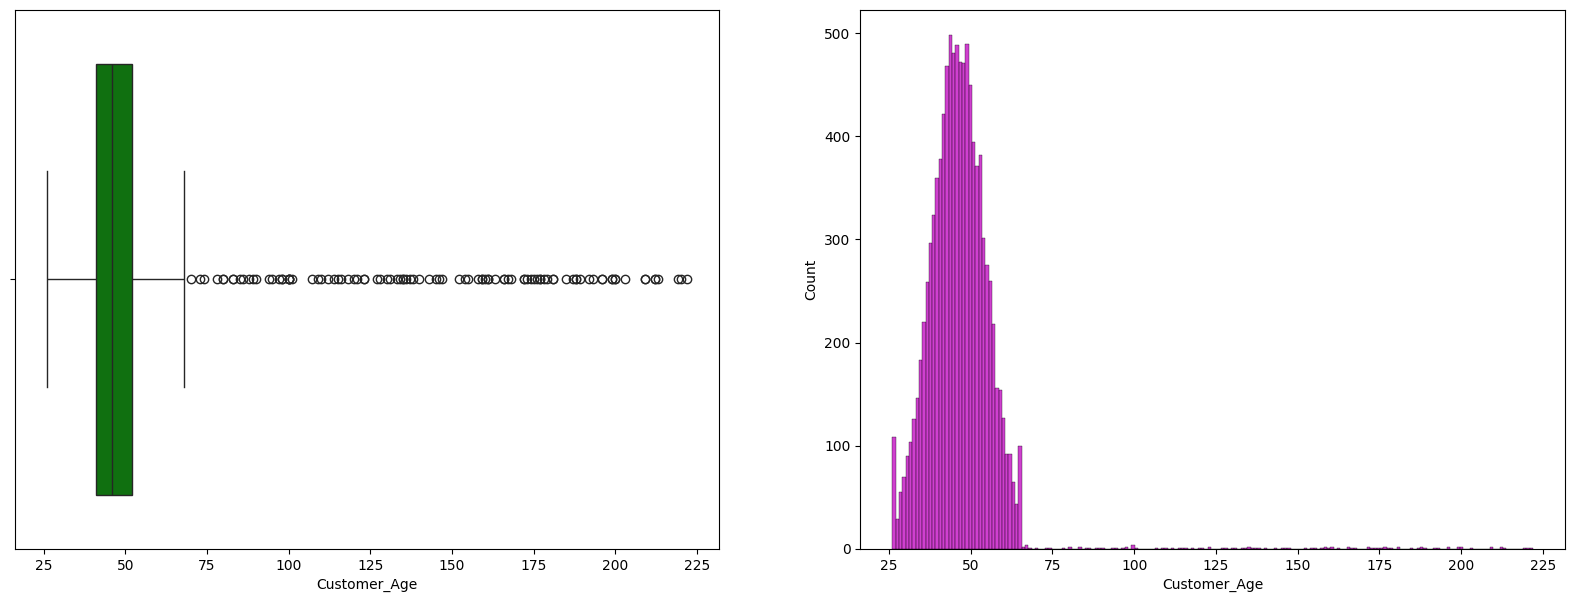

In [87]:
#Distribution of customer age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Customer_Age"], ax = ax[1], color = "m")
sns.boxplot(x = df["Customer_Age"], ax = ax[0], color = "g")
plt.show()

## Outliers Analysis and Treatment:
Customers who are above 75 years of age are outliers. To treat the outliers, their age is replaced by the mean. This is not the only solution to treat the outliers. Machine learning can help in this scenario.

In [88]:
mean = int(df.Customer_Age.mean())
x = df[df["Customer_Age"] > 75].index
for index in x:
    df.loc[index, "Customer_Age"] = mean

In [89]:
info_of_numerical("Customer_Age")

The mean of the Customer_Age is 46.32931766564629
The median of the Customer_Age is 46.0
The mode of the Customer_Age is 47
The standard deviation of the Customer_Age is 7.9775059377027295
Number of missing values in the Customer_Age is 0


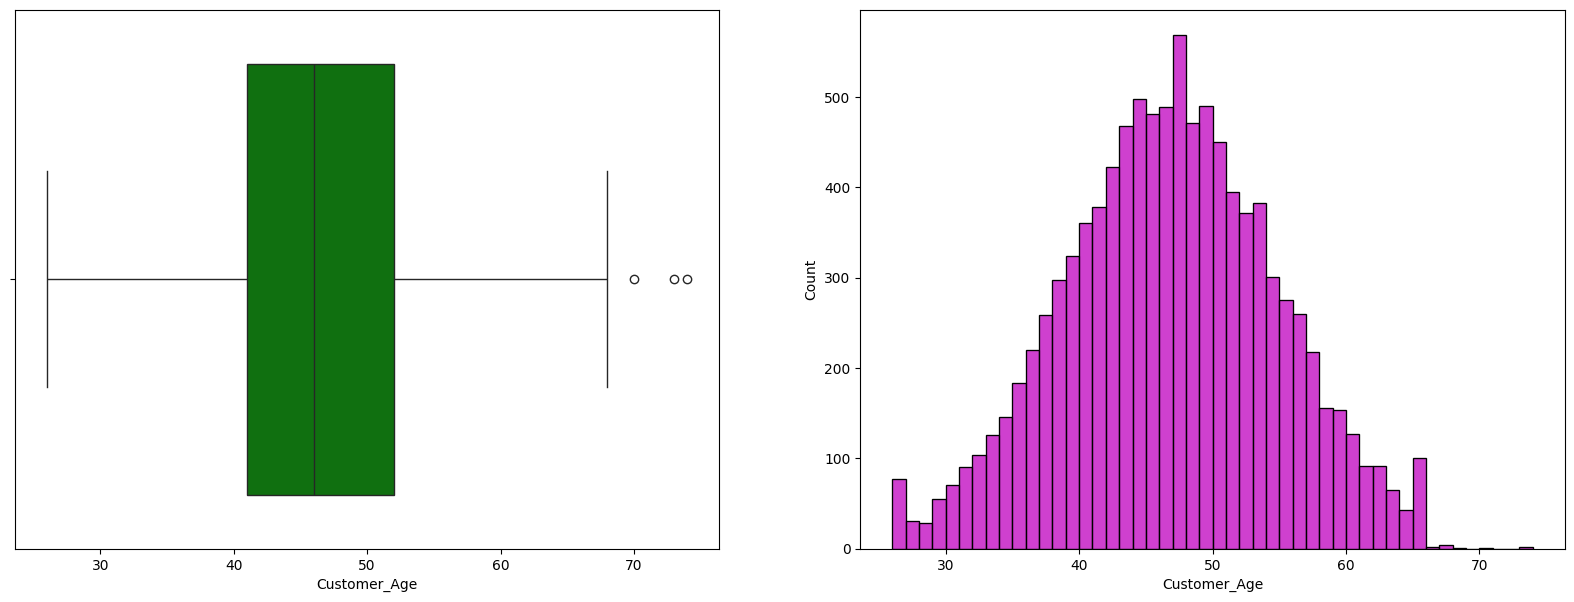

In [90]:
# Distribution of Customer_Age (Outlier Analysis)
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Customer_Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Customer_Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## 12. Analysis of  Total_Revolving_Bal: Balance that is carried over month to month


In [91]:
info_of_numerical("Total_Revolving_Bal")

The mean of the Total_Revolving_Bal is 1162.8140614199665
The median of the Total_Revolving_Bal is 1276.0
The mode of the Total_Revolving_Bal is 0
The standard deviation of the Total_Revolving_Bal is 814.9873352357522
Number of missing values in the Total_Revolving_Bal is 0


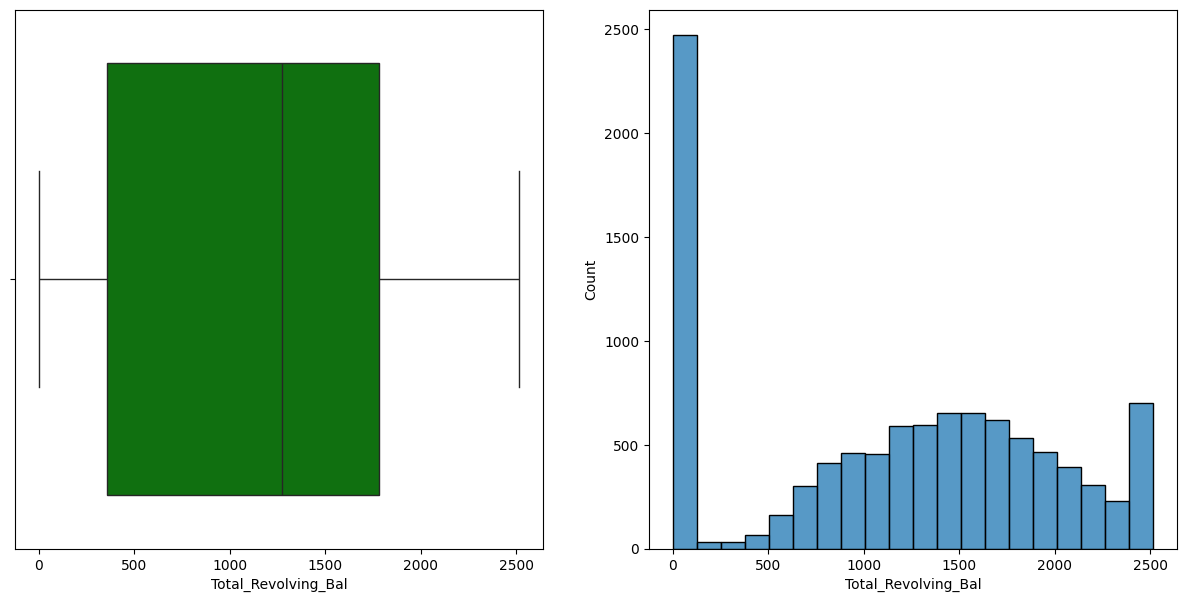

In [92]:
fig, ax = plt.subplots(1, 2, figsize= (15, 7))
sns.histplot(x = df['Total_Revolving_Bal'])                         # x axis contains the revolving balance amount in dollars.
                                                                    # y axis has the count of the customers.
sns.boxplot(x = df['Total_Revolving_Bal'], ax = ax[0], color = "g") # c : color: b is black
plt.show()

## 13. Analysis of  Avg_Open_To_Buy: 
### Difference between the credit limit assigned to a cardholder and the present balance on the account at that time.

```Description: Monthly credit limit is $12,000.  If the customer spends $5,000 in a month, then the remaining balance is $7,000 which is called "Average Open to Buy".```
 
 

In [93]:
info_of_numerical("Avg_Open_To_Buy")

The mean of the Avg_Open_To_Buy is 7469.139636614989
The median of the Avg_Open_To_Buy is 3474.0
The mode of the Avg_Open_To_Buy is 1438.3
The standard deviation of the Avg_Open_To_Buy is 9090.685323679103
Number of missing values in the Avg_Open_To_Buy is 0


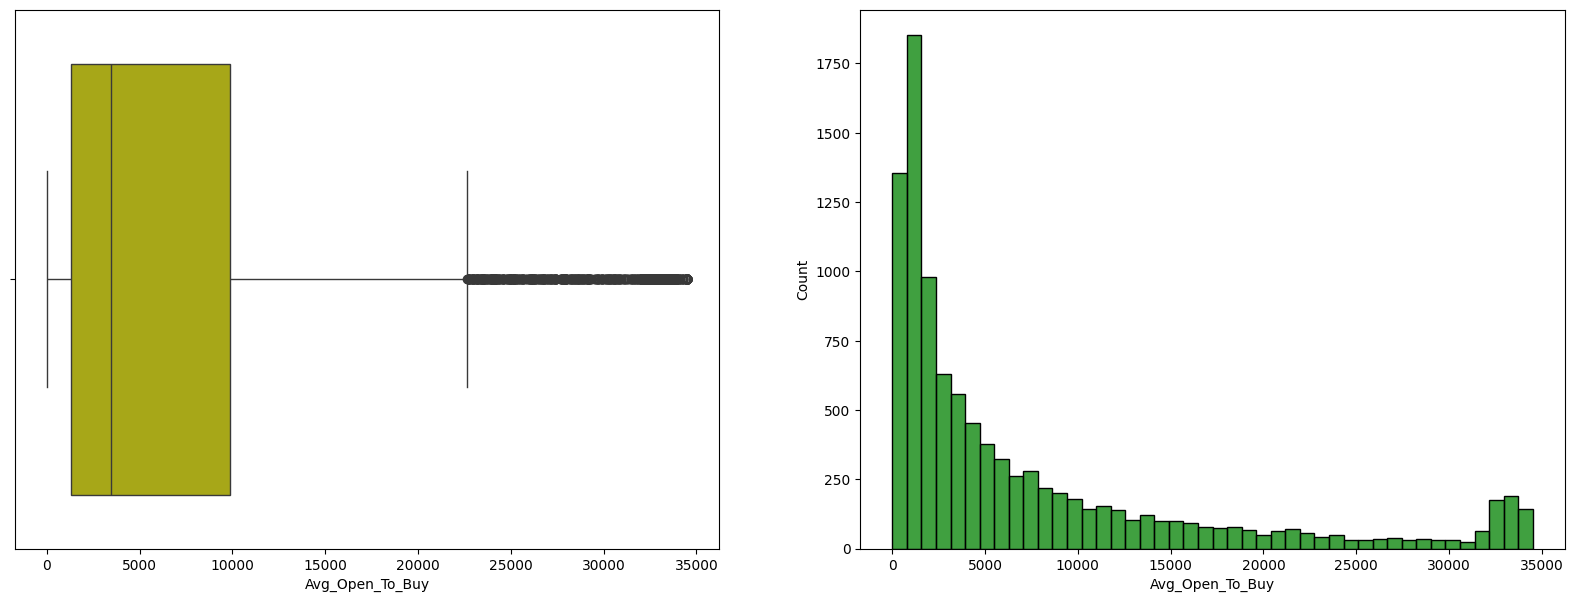

In [94]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(df["Avg_Open_To_Buy"], ax = ax[1], color= "g")     # xaxis: its a dollar amount which shows the difference between the credit limit and the prersent balance
sns.boxplot(x = df['Avg_Open_To_Buy'], ax = ax[0], color = "y") # color = y:  yellow
plt.show()

## 14. Analysis of  the Total Transaction Count: Number of transactions made by the card holder


In [95]:
info_of_numerical("Total_Trans_Ct")

The mean of the Total_Trans_Ct is 64.85869457884863
The median of the Total_Trans_Ct is 67.0
The mode of the Total_Trans_Ct is 81
The standard deviation of the Total_Trans_Ct is 23.472570449232997
Number of missing values in the Total_Trans_Ct is 0


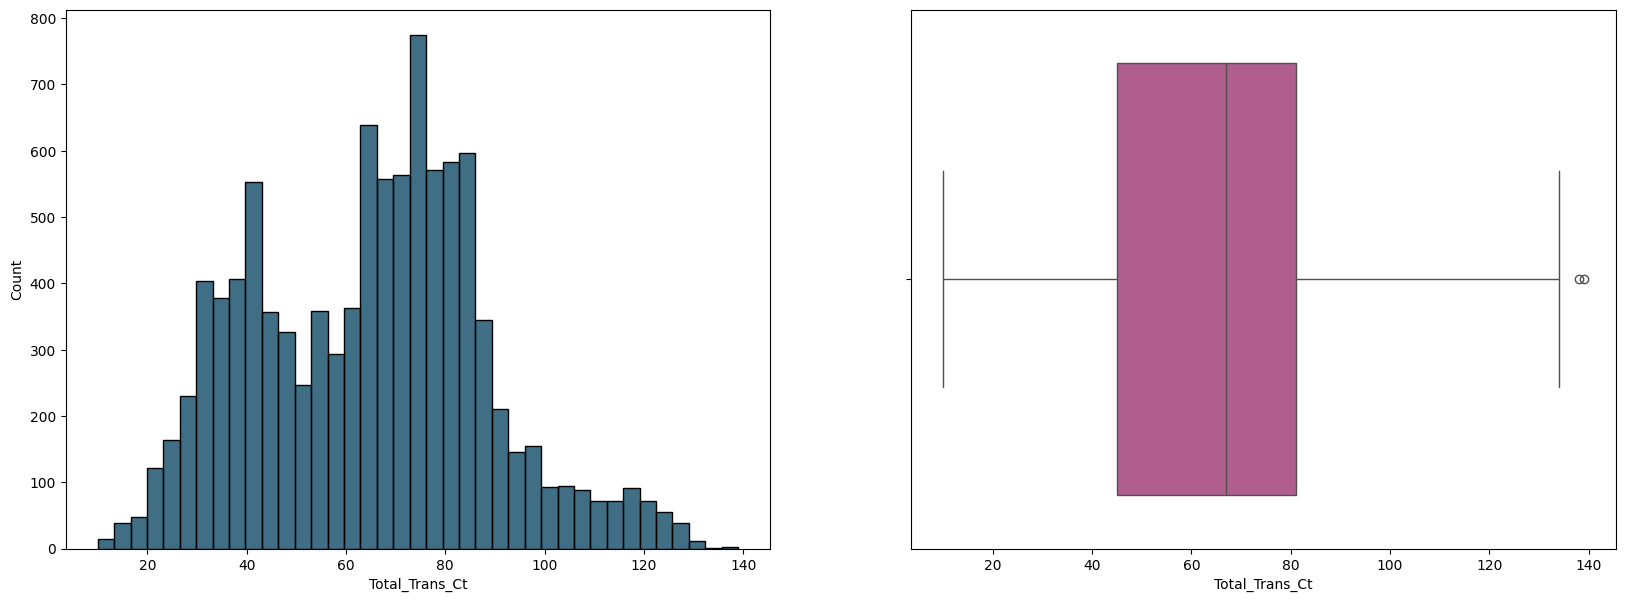

In [96]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(x = df['Total_Trans_Ct'], ax = ax[0], color= "#003f5c") #ax[0]: graph(Histogram) will be ploted at 0th position
sns.boxplot(x = df["Total_Trans_Ct"], ax = ax[1], color='#bc5090')  #ax[1]: graph(Boxplot) will be ploted at 0th position
plt.show()
